## Capturing Images

In [ ]:
import cv2
import os
import time

# Set the face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Set the directory for the dataset
dataset_path = 'dataset/'

# Set the name of the person
person_name = input("Enter the name of the person: ")
person_path = os.path.join(dataset_path, person_name)

# Create the directory if it doesn't exist
if not os.path.exists(person_path):
    os.makedirs(person_path)

# Initialize the camera
cap = cv2.VideoCapture(0)

# Set the number of images to capture
num_images = 200
image_count = 0

while image_count < num_images:
    ret, frame = cap.read()

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Save the captured face
        face_img = gray[y:y+h, x:x+w]

        # Preprocess the image
        resized_face = cv2.resize(face_img, (224, 224))  # Adjust the size based on your model's input size
        normalized_face = resized_face / 255.0

        # Save the preprocessed image
        img_name = f"img{image_count+1}.jpg"
        img_path = os.path.join(person_path, img_name)
        cv2.imwrite(img_path, (normalized_face * 255).astype("uint8"))

        image_count += 1

        # Display the captured image for a short time
        cv2.imshow('Captured Face', face_img)
        cv2.waitKey(500)  # Adjust the time in milliseconds (1000 = 1 seconds)

    # Display the frame
    cv2.imshow('Capture Face', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera
cap.release()

# Destroy all OpenCV windows
cv2.destroyAllWindows()

## Assigning Labels 
## One-Hot Encoding

In [1]:
import os
import cv2
import numpy as np

# Set the directory for the dataset
dataset_path = 'dataset/'

# Get the list of persons (subdirectories)
persons = os.listdir(dataset_path)

# Create label mapping for each person
label_mapping = {person: idx for idx, person in enumerate(persons)}

# Initialize the list to store data and labels
data = []

# Loop over each person's folder
for person in persons:
    person_directory = os.path.join(dataset_path, person)

    # Get the label for the person
    label = [0] * len(persons)
    label[label_mapping[person]] = 1

    # Loop over each image in the person's folder
    for img_name in os.listdir(person_directory):
        img_path = os.path.join(person_directory, img_name)

        # Read the image 
        img = cv2.imread(img_path)

        # preprocessing
        resized_img = cv2.resize(img, (224, 224))
        normalized_img = resized_img / 255.0

        # Append the preprocessed image and label to the list
        data.append([img, label])

# Convert the list to a NumPy array
data = np.array(data)

# Shuffle the data
np.random.shuffle(data)

# Print the shape of the data
print("Shape of data:", data.shape)

# Save the data to a file (if needed)
np.save('data.npy', data)


C:\Users\DELL\AppData\Local\Temp\ipykernel_30784\591237855.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


Shape of data: (1700, 2)


In [2]:
import os
import cv2
import numpy as np

# Set the directory for the dataset
dataset_path = 'dataset/'

# Get the list of persons (subdirectories)
persons = os.listdir(dataset_path)

# Create label mapping for each person
label_mapping = {person: idx for idx, person in enumerate(persons)}

# Initialize the list to store data and labels
data = []

# Loop over each person's folder
for person in persons:
    person_directory = os.path.join(dataset_path, person)

    # Get the label for the person
    label = [0] * len(persons)
    label[label_mapping[person]] = 1

    # Loop over each image in the person's folder
    for img_name in os.listdir(person_directory):
        img_path = os.path.join(person_directory, img_name)

        # Read the image 
        img = cv2.imread(img_path)

        # preprocessing
        resized_img = cv2.resize(img, (224, 224))
        normalized_img = resized_img / 255.0

        # Append the preprocessed image and label to the list
        data.append([normalized_img, label])

# Convert the list to a NumPy array
data = np.array(data)

# Shuffle the data
np.random.shuffle(data)

C:\Users\DELL\AppData\Local\Temp\ipykernel_30784\2156387023.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


### Visualisation

In [3]:
print("Label Mapping:")
for person, label in label_mapping.items():
    print(f"{person}: {label}")


Label Mapping:
Ajay: 0
Akshat: 1
Ananya: 2
Isha: 3


In [4]:
print("One-Hot Encoded Labels:")
for person, label in label_mapping.items():
    one_hot_encoded = [0] * len(label_mapping)
    one_hot_encoded[label] = 1
    print(f"{person}: {one_hot_encoded}")


One-Hot Encoded Labels:
Ajay: [1, 0, 0, 0]
Akshat: [0, 1, 0, 0]
Ananya: [0, 0, 1, 0]
Isha: [0, 0, 0, 1]


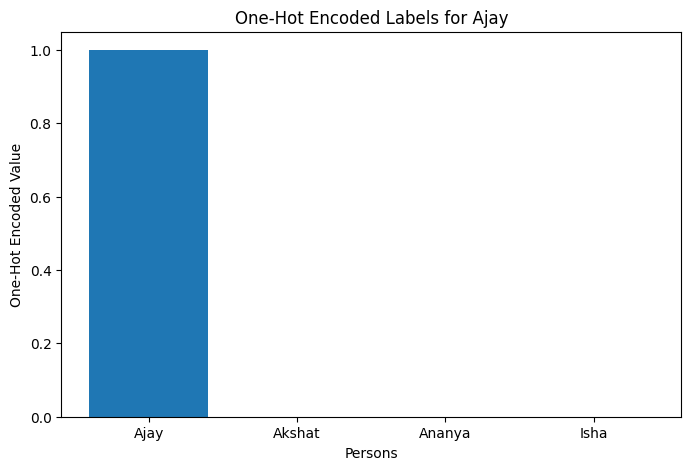

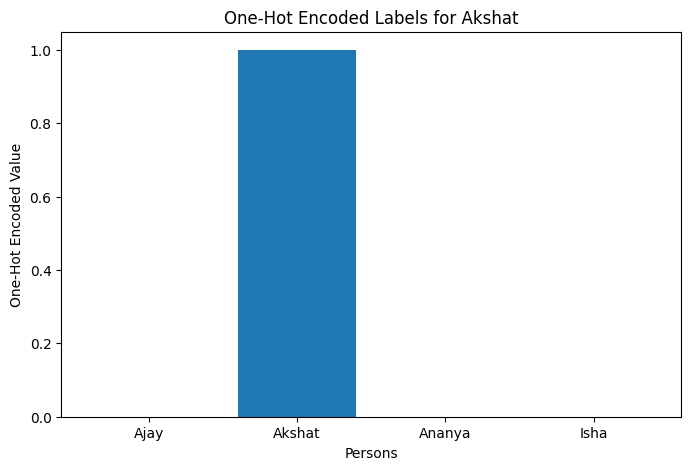

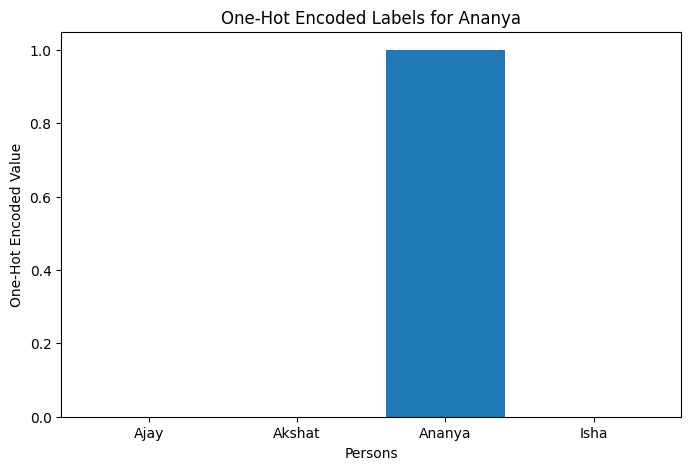

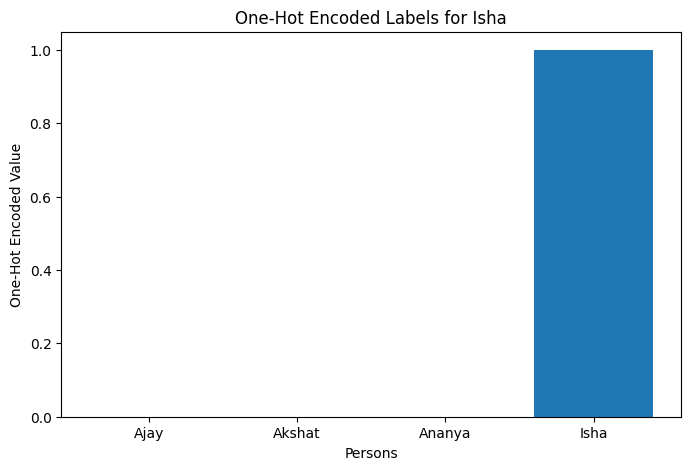

In [5]:
import matplotlib.pyplot as plt

# Visualize the one-hot encoded labels
for person, label in label_mapping.items():
    one_hot_encoded = [0] * len(label_mapping)
    one_hot_encoded[label] = 1

    # Create a bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(range(len(label_mapping)), one_hot_encoded, tick_label=list(label_mapping.keys()))
    plt.title(f"One-Hot Encoded Labels for {person}")
    plt.xlabel("Persons")
    plt.ylabel("One-Hot Encoded Value")
    plt.show()


## Data Splitting - Training and Testing

In [6]:
from sklearn.model_selection import train_test_split

# Assuming 'data' contains both images and labels
X = np.array([item[0] for item in data])
y = np.array([item[1] for item in data])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1360, 224, 224, 3)
X_test shape: (340, 224, 224, 3)
y_train shape: (1360, 4)
y_test shape: (340, 4)


### Visualisation

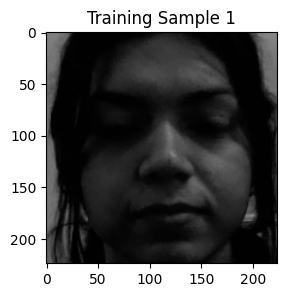

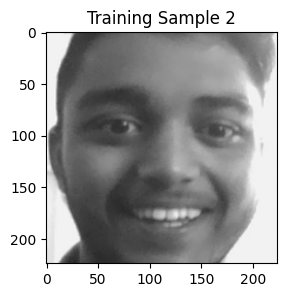

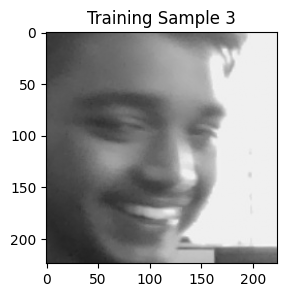

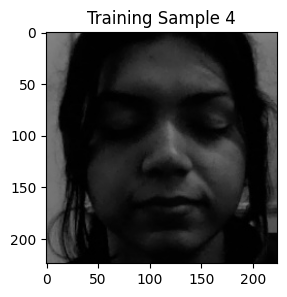

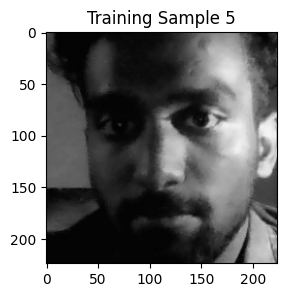

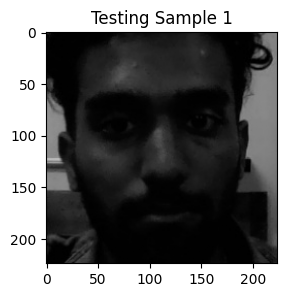

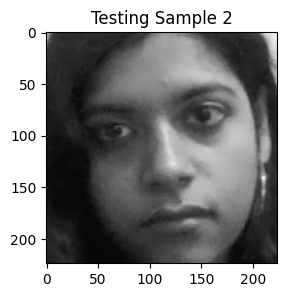

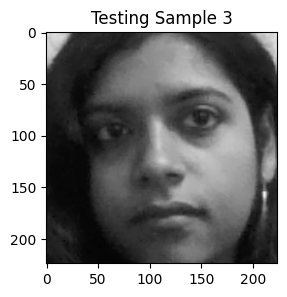

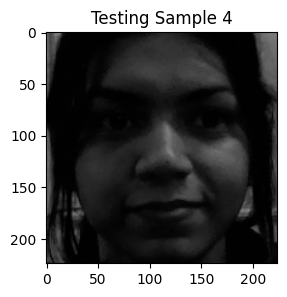

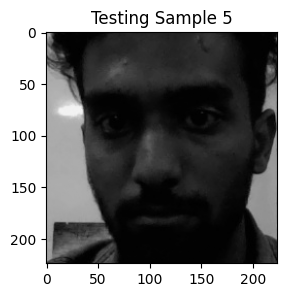

In [7]:
import matplotlib.pyplot as plt

# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are your data arrays

# Visualize the first few samples in the training set
for i in range(5):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_train[i], cmap='gray')  # Assuming grayscale images
    plt.title(f'Training Sample {i + 1}')
    plt.show()

# Visualize the first few samples in the testing set
for i in range(5):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_test[i], cmap='gray')  # Assuming grayscale images
    plt.title(f'Testing Sample {i + 1}')
    plt.show()


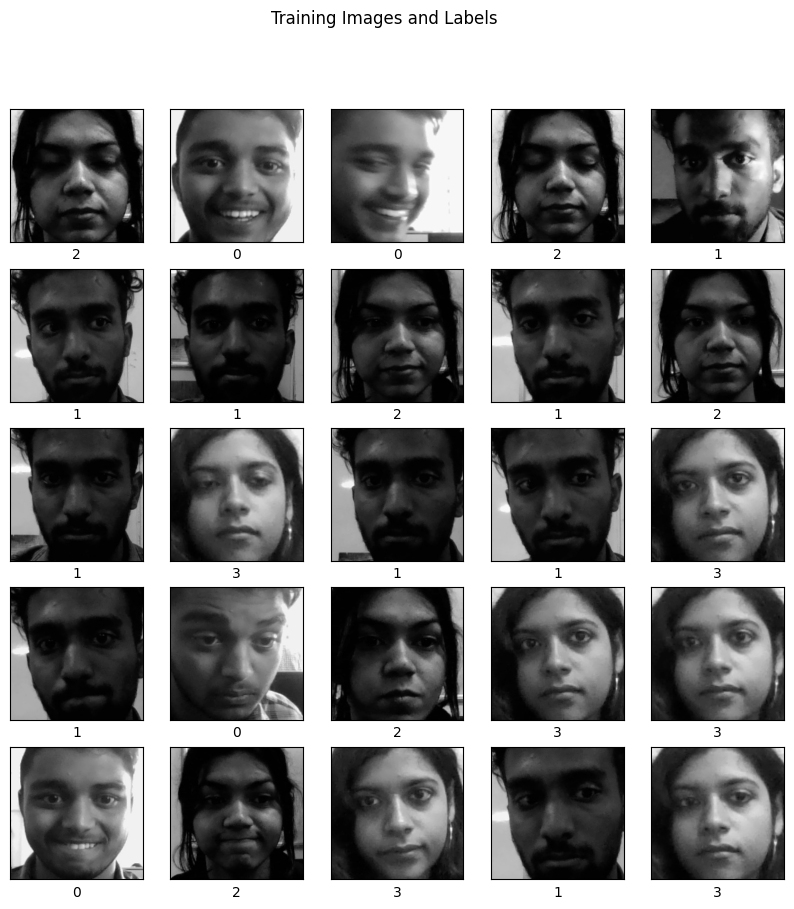

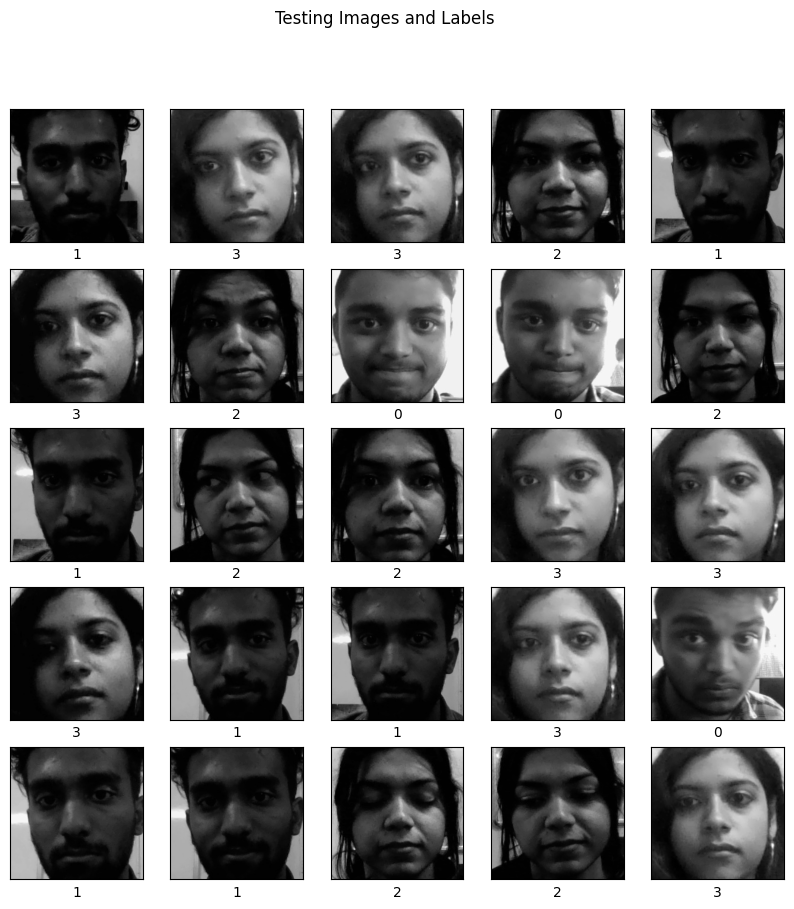

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images with labels
def visualize_images(images, labels, title):
    plt.figure(figsize=(10, 10))
    for i in range(min(25, len(images))):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i][:, :, 0], cmap='gray')  # Assuming images are grayscale
        plt.xlabel(np.argmax(labels[i]))  # Show the label as text
    plt.suptitle(title)
    plt.show()

# Visualize training images and labels
visualize_images(X_train, y_train, title="Training Images and Labels")

# Visualize testing images and labels
visualize_images(X_test, y_test, title="Testing Images and Labels")


# CNN Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(4, activation='softmax'))  # Adjust the number of output neurons based on the number of classes



In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))


Epoch 1/15
43/43 [==============================] - 74s 2s/step - loss: 0.3381 - accuracy: 0.8816 - val_loss: 0.0741 - val_accuracy: 0.9853
Epoch 2/15
43/43 [==============================] - 65s 2s/step - loss: 0.0760 - accuracy: 0.9779 - val_loss: 0.0478 - val_accuracy: 0.9912
Epoch 3/15
43/43 [==============================] - 65s 2s/step - loss: 0.0972 - accuracy: 0.9721 - val_loss: 0.0394 - val_accuracy: 0.9882
Epoch 4/15
43/43 [==============================] - 65s 2s/step - loss: 0.0537 - accuracy: 0.9868 - val_loss: 0.0537 - val_accuracy: 0.9882
Epoch 5/15
43/43 [==============================] - 64s 1s/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0456 - val_accuracy: 0.9912
Epoch 6/15
43/43 [==============================] - 63s 1s/step - loss: 0.0219 - accuracy: 0.9941 - val_loss: 0.0217 - val_accuracy: 0.9941
Epoch 7/15
43/43 [==============================] - 62s 1s/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0187 - val_accuracy: 0.9941
Epoch 8/15
43/43 [==

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


11/11 [==============================] - 4s 336ms/step - loss: 0.0051 - accuracy: 0.9971
Test Loss: 0.0050615887157619, Test Accuracy: 0.9970588088035583


In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)


11/11 [==============================] - 4s 321ms/step


### Prediction and Visualisation

11/11 [==============================] - 3s 316ms/step
Sample 1: True Label = 1, Predicted Label = 1
Sample 2: True Label = 3, Predicted Label = 3
Sample 3: True Label = 3, Predicted Label = 3
Sample 4: True Label = 2, Predicted Label = 2
Sample 5: True Label = 1, Predicted Label = 1
Sample 6: True Label = 3, Predicted Label = 3
Sample 7: True Label = 2, Predicted Label = 2
Sample 8: True Label = 0, Predicted Label = 0
Sample 9: True Label = 0, Predicted Label = 0
Sample 10: True Label = 2, Predicted Label = 2


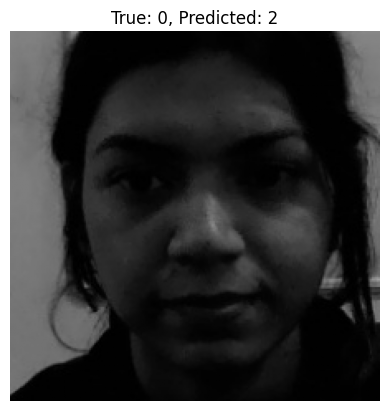

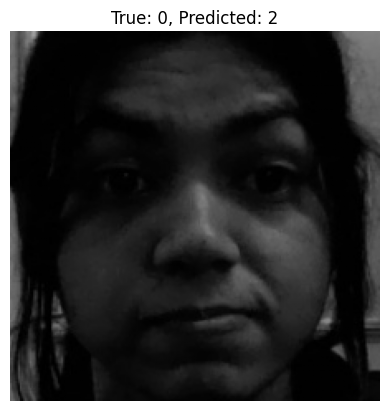

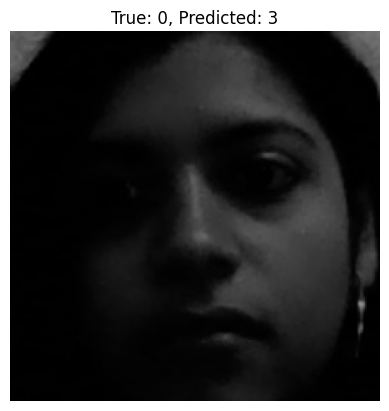

In [13]:
import matplotlib.pyplot as plt
import random
from sklearn.metrics import classification_report, confusion_matrix

# Function to convert one-hot encoded labels to class labels
def one_hot_to_label(one_hot):
    if len(one_hot.shape) > 1:
        return np.argmax(one_hot, axis=1)
    else:
        return int(one_hot[0])  # Extract the single value from the array

# Function to display random images from the test set with true and predicted labels
def visualize_predictions(X_test, y_true, y_pred):
    num_samples_to_display = 3
    random_indices = random.sample(range(len(X_test)), num_samples_to_display)

    for idx in random_indices:
        # Display the image
        plt.imshow(X_test[idx])
        plt.title(f"True: {one_hot_to_label(y_true[idx])}, Predicted: {y_pred[idx]}")
        plt.axis('off')
        plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Convert one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Print true and predicted labels for a few samples
for i in range(10):  # Adjust the range based on the number of samples you want to inspect
    print(f"Sample {i + 1}: True Label = {y_true_classes[i]}, Predicted Label = {y_pred_classes[i]}")

# Visualize predictions
visualize_predictions(X_test, y_test, y_pred_classes)





1/1 [==============================] - 0s 123ms/step


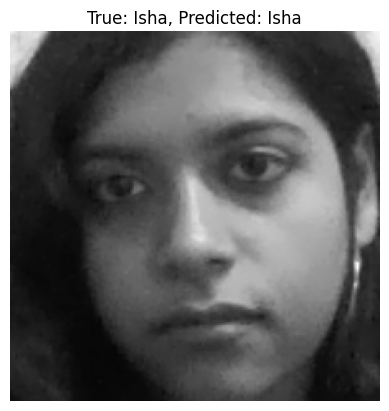

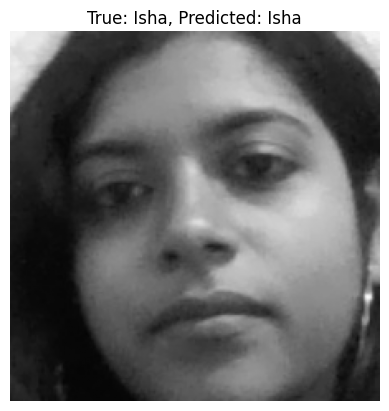

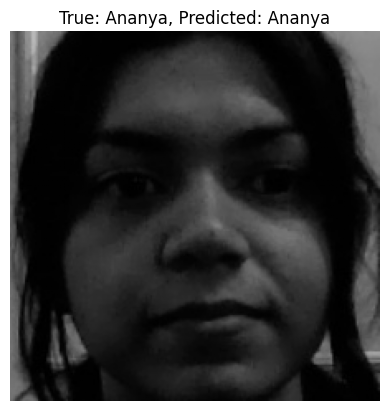

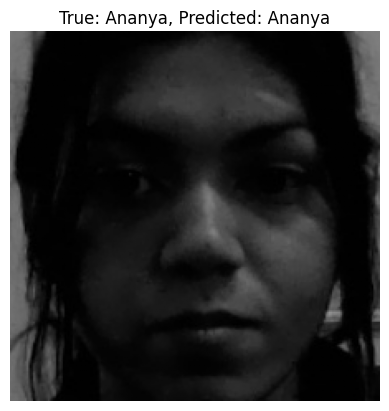

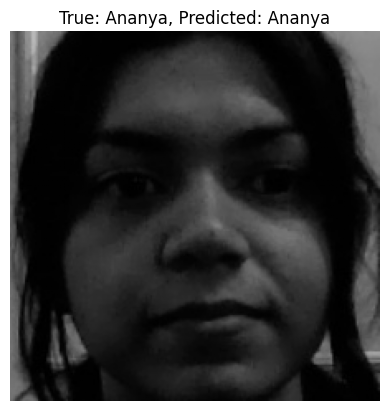

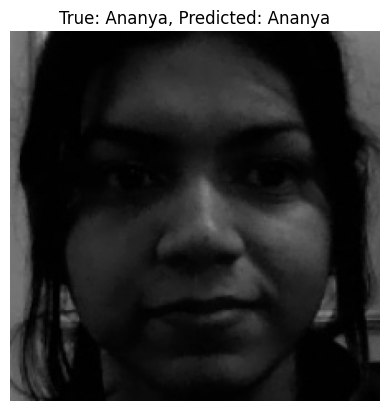

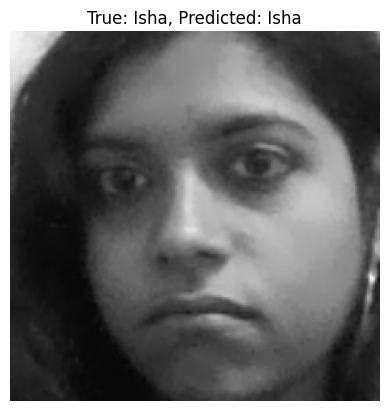

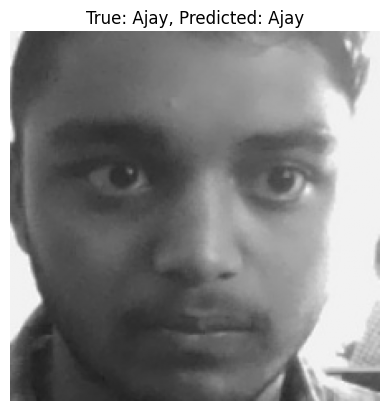

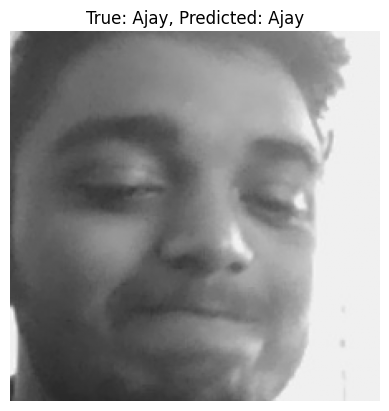

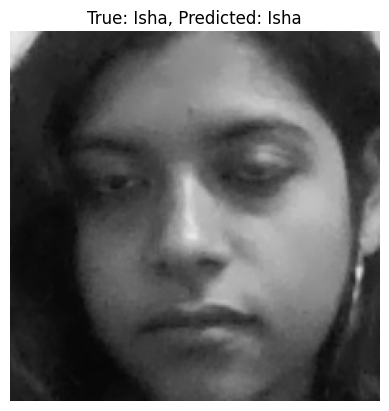

In [14]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Function to perform predictions on random images from the dataset
def random_dataset_detection(model, dataset_path, label_mapping):
    # Get the list of persons (subdirectories)
    persons = os.listdir(dataset_path)

    # Initialize lists to store random images and labels
    random_images = []
    random_labels = []

    num_samples_to_predict = 10  # Adjust the number of samples to predict

    for _ in range(num_samples_to_predict):
        # Choose a random person from the dataset
        random_person = random.choice(persons)
        person_directory = os.path.join(dataset_path, random_person)

        # Choose a random image from the person's folder
        random_image_name = random.choice(os.listdir(person_directory))
        img_path = os.path.join(person_directory, random_image_name)

        # Read and preprocess the random image
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, (224, 224))
        normalized_img = resized_img / 255.0

        # Append the preprocessed image to the list
        random_images.append(normalized_img)

        # Get the label for the person
        label = [0] * len(label_mapping)
        label[label_mapping[random_person]] = 1
        random_labels.append(label)

    # Convert the list of random images to a NumPy array
    random_images = np.array(random_images)

    # Make predictions on the random images
    predictions = model.predict(random_images)

    # Convert one-hot encoded predictions to class labels
    predicted_classes = [np.argmax(prediction) for prediction in predictions]

    # Display random images and their predicted labels
    for i in range(num_samples_to_predict):
        plt.imshow(random_images[i])
        true_label = [person for person, label in label_mapping.items() if random_labels[i][label] == 1][0]
        predicted_label = [person for person, label in label_mapping.items() if predicted_classes[i] == label][0]
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

# Call the function to perform predictions
random_dataset_detection(model, dataset_path, label_mapping)


In [15]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_true_classes, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       101
           2       1.00      0.99      1.00       104
           3       0.99      1.00      0.99        99

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00       340
weighted avg       1.00      1.00      1.00       340

Confusion Matrix:
 [[ 36   0   0   0]
 [  0 101   0   0]
 [  0   0 103   1]
 [  0   0   0  99]]


In [16]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import os

# Load the trained model
# If your model is already defined in this file, you can skip this step
# model = load_model('your_trained_model.h5')  # Load your saved model

# Initialize the camera
cap = cv2.VideoCapture(0)

# Load your face detection classifier (e.g., Haar Cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load label mapping
dataset_path = 'dataset/'
persons = os.listdir(dataset_path)
label_mapping = {person: idx for idx, person in enumerate(persons)}
label_mapping_reverse = {v: k for k, v in label_mapping.items()}

while True:
    # Capture a frame from the camera
    ret, frame = cap.read()

    # Preprocess the frame
    resized_frame = cv2.resize(frame, (224, 224))
    normalized_frame = resized_frame / 255.0
    input_frame = np.expand_dims(normalized_frame, axis=0)  # Add batch dimension

    # Detect faces
    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Draw a green rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Preprocess the face
        face_img = frame[y:y + h, x:x + w]
        resized_face = cv2.resize(face_img, (224, 224))
        normalized_face = resized_face / 255.0
        input_face = np.expand_dims(normalized_face, axis=0)  # Add batch dimension

        # Make a prediction using your pre-loaded model
        predictions = model.predict(input_face)

        # Convert the prediction to a class label (e.g., person's name)
        predicted_class = label_mapping_reverse[np.argmax(predictions)]

        # Display the predicted class (person's name) on the face square
        cv2.putText(frame, predicted_class, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show the frame with the prediction
    cv2.imshow('Live Prediction', frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close the OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 41ms/step
